In [1]:
import pandas as pd

In [2]:
tab1 = pd.read_csv('bin_2_2_2.csv')
tab1 = tab1.drop('Unnamed: 0', axis=1)

In [3]:
tab2 = pd.read_csv('bin_3_3_3.csv')
tab2 = tab2.drop('Unnamed: 0', axis=1)

In [4]:
tab3 = pd.read_csv('bin_4_4_4.csv')
tab3 = tab3.drop('Unnamed: 0', axis=1)

In [5]:
tab4 = pd.read_csv('bin_5_5_5.csv')
tab4 = tab4.drop('Unnamed: 0', axis=1)

In [6]:
tab5 = pd.read_csv('bin_6_6_6.csv')
tab5 = tab5.drop('Unnamed: 0', axis=1)

In [7]:
tab6 = pd.read_csv('bin_7_7_7.csv')
tab6 = tab6.drop('Unnamed: 0', axis=1)


In [8]:
concat = pd.concat([tab1,tab2,tab3,tab4,tab5,tab6], axis = 0)

In [9]:
concat

,A,"I(X,A)",a,a_count,"I(X,Y|A=a)",Y,"I(X,A|Y=y)","I(X,Y)",bins
0,gender,0.368731,Female,14845.0,0.863508,0,0.279328,0.821123,"2,2,2,20"
1,gender,0.368731,Female,14845.0,0.863508,1,0.338317,0.821123,"2,2,2,20"
2,gender,0.368731,Female,14845.0,0.863508,2,0.362774,0.821123,"2,2,2,20"
3,gender,0.368731,Female,14845.0,0.863508,3,0.412766,0.821123,"2,2,2,20"
4,gender,0.368731,Female,14845.0,0.863508,4,0.443922,0.821123,"2,2,2,20"
...,...,...,...,...,...,...,...,...,...
375,marital-status,0.878201,Widowed,1278.0,1.746490,15,0.501020,1.094250,"7,7,7,20"
376,marital-status,0.878201,Widowed,1278.0,1.746490,16,0.490893,1.094250,"7,7,7,20"
377,marital-status,0.878201,Widowed,1278.0,1.746490,17,0.376533,1.094250,"7,7,7,20"
378,marital-status,0.878201,Widowed,1278.0,1.746490,18,0.522228,1.094250,"7,7,7,20"


In [10]:
subset = concat[["bins","A", "I(X,A)","I(X,Y)"]]

In [11]:
subset = subset.drop_duplicates(ignore_index=True)

In [12]:
subset

,bins,A,"I(X,A)","I(X,Y)"
0,"2,2,2,20",gender,0.368731,0.821123
1,"2,2,2,20",race,0.123202,0.821123
2,"2,2,2,20",age_bins,0.298816,0.821123
3,"2,2,2,20",marital-status,0.826275,0.821123
4,"3,3,3,20",gender,0.373408,0.906593
5,"3,3,3,20",race,0.134541,0.906593
6,"3,3,3,20",age_bins,0.339615,0.906593
7,"3,3,3,20",marital-status,0.844384,0.906593
8,"4,4,4,20",gender,0.381520,0.978542
9,"4,4,4,20",race,0.148931,0.978542


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import seaborn as sns
sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [14]:

subset['type'] = subset['A'].apply(lambda v: 'I(X;A='+ v + ')')
subset.head()

,bins,A,"I(X,A)","I(X,Y)",type
0,"2,2,2,20",gender,0.368731,0.821123,I(X;A=gender)
1,"2,2,2,20",race,0.123202,0.821123,I(X;A=race)
2,"2,2,2,20",age_bins,0.298816,0.821123,I(X;A=age_bins)
3,"2,2,2,20",marital-status,0.826275,0.821123,I(X;A=marital-status)
4,"3,3,3,20",gender,0.373408,0.906593,I(X;A=gender)


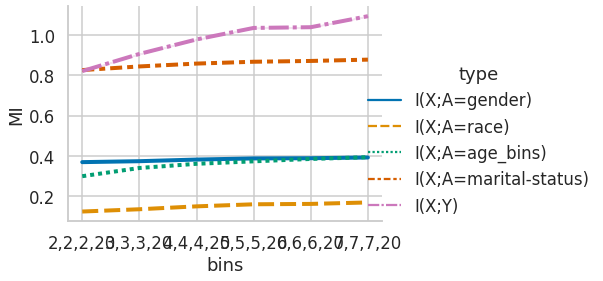

In [15]:

subset_a = subset[['type','I(X,A)','bins']].rename(columns={'I(X,A)':'MI'})
subset_y = subset[['I(X,Y)','bins']].rename(columns={'I(X,Y)':'MI'})
subset_y['type'] = 'I(X;Y)'
subset_plt = pd.concat([subset_a,subset_y]).reset_index()
subset_plt
plot = sns.relplot(data = subset_plt,x='bins',y='MI',hue='type',kind='line',style='type',aspect=1.3,linewidth=4)

plot.fig.set_size_inches(9,4)
